<a href="https://colab.research.google.com/github/cengaiyeung/20MA573/blob/master/%E2%80%9CHW2(part_2)%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1:**

Suppose that we wish to approximate the first derivative $f'(x)$ of a very smooth function with an error of only $O(h^{4})$, where h is the step size. Which difference approximation could we use?

(Hint: you may consider to use more than two points in the neighborhood)




**Answer:**

First, we consider the Taylor series expansions for each of these 4 terms at $x$: $f(x+h), f(x-h), f(x+2h), f(x-2h)$. We have

$$f(x+h) = f(x) + \sum_{k = 1}^{5} \frac{1}{k!} f^{(k)} (x)  h^{k} + O(h^{6}),$$

and

$$f(x-h) = f(x) + \sum_{k = 1}^{5} \frac{1}{k!} f^{(k)} (x)  (-h)^{k} + O(h^{6}),$$

and 

$$f(x+2h) = f(x) + \sum_{k = 1}^{5} \frac{1}{k!} f^{(k)} (x)  (2h)^{k} + O(h^{6}),$$

and

$$f(x-2h) = f(x) + \sum_{k = 1}^{5} \frac{1}{k!} f^{(k)} (x)  (-2h)^{k} + O(h^{6}).$$

So we have

$$f(x+2h) - f(x-2h) = 4h f'(x) + \frac{8}{3} h^{3} f^{(3)}(x) + \frac{8}{15}h^{5} f^{(5)} (x)+ O(h^{6}),$$

and 

$$f(x+h) - f(x-h) = 2h f'(x) + \frac{1}{3}h^{3} f^{(3)}(x) + \frac{1}{60} h^{5} f^{(5)}(x) + O(h^{6}).$$

We don't need the term $f^{(3)} (x)$, so

$$8 \Big(f(x+h) -f(x-h) \Big) - \Big(f(x+2h) -f(x-2h) \Big) = 12h f'(x) - \frac{2}{5} h^{5} f^{(5)}(x) + O(h^{6}),$$

such that

$$\frac{8 \Big(f(x+h) -f(x-h) \Big) - \Big(f(x+2h) -f(x-2h) \Big)}{12h} - f'(x) = O(h^{4})$$

since f(x) is a very smooth function.

So, we can use formula

$$\frac{8 \Big(f(x+h) -f(x-h) \Big) - \Big(f(x+2h) -f(x-2h) \Big)}{12h}$$

to approximate the first derivative $f'(x)$, and the convergence order is 4.

Next we can use code to verify the above conclusion.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

In [0]:
def fd(f, x, h):
    return (8 * f(x + h) - 8 * f(x - h) - f(x + 2 * h) + f(x - 2 * h)) / h /12

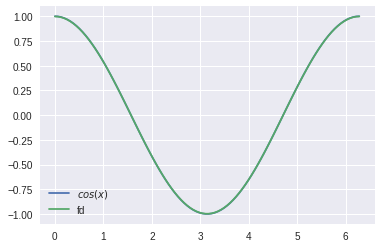

In [0]:
h = .5 #step size

x_co = np.linspace(0, 2*np.pi, 100)
plt.plot(x_co, np.cos(x_co), label = '$cos(x)$');
plt.plot(x_co, fd(np.sin, x_co, h), label = 'fd');
plt.legend();

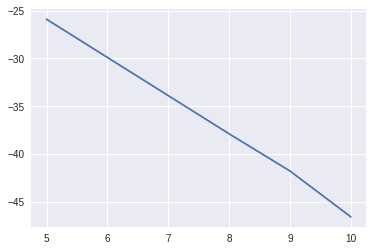

In [0]:
x_target = np.pi/3   #target point to be examined
y_target = np.cos(x_target) #exact derivative value at the target point

nn = np.arange(5, 11)
hh = 1/np.power(2, nn)  #step sizes to be taken
err = fd(np.sin, x_target, hh) - y_target  #errors corresponding to each step size
yy = np.log2(np.abs(err))
plt.plot(nn, yy)

In [0]:
import scipy.stats as ss
out = ss.linregress(nn,yy)
print('the convergence order is ' + str(-out[0]))

the convergence order is 4.091196230153909


**Question 2:**

Let $f: \mathbb{R} \mapsto \mathbb{R}$ be a smooth even function satisfying $f(0) =0$. Our objective is to approxiamte the second order derivative $f''(0)$.

**(1)** Prove that $f'(0) = 0$.

**(1) Proof:**

Since f(x) is an even function, we have $f(x) = f(-x)$, for any $x \in \mathbb{R}$. Taking the derivative on the both side, we have

$$f'(x) = - f'(-x),$$

such that $f'(x)$ is an odd function. And we set $x = 0$, then $f'(0) = -f'(0)$, so $f'(0) = 0$.

**(2)** Gwan proposes the following estimator for $f''(0)$: for a step size h

$$a_{h} = \frac{2 f(h)}{h^{2}}.$$

Please justify that Chenyu's estimation has its convergence $O(h^{2})$.



**(2) Solution:**

Since $f(x)$ is a smooth even function and $f(0) = 0$, then we have $f'(x)$ is an odd function by the result in (1). Since $ - f'(x) = f'(-x)$, we take the derivetive on the both side, then

$$f''(x) = f''(-x),$$

so $f''(x)$ is an even function. By the same way, we have

$$f^{(3)} (x) = - f^{(3)}(-x),$$

so we know that $f^{(3)}(x)$ is an odd function with $f^{(3)}(0) = 0$.

We consider the Taylor series expansions of $f(x+h)$ at $x = 0$, then we have

$$f(x+h) = f(x) + f'(x) h + \frac{1}{2}f''(x)h^{2} + \frac{1}{3!} f^{(3)}(x)h^{3} + O(h^{4})$$

when $f^{(4)} (x) \neq 0$.

Since $f(0)=0, f'(0) = 0$ and $f^{(3)}(0) = 0$, we have

$$f(h) = \frac{1}{2}f''(0) h^{2} + O(h^{4}).$$

Then

$$\frac{2f(h)}{h^{2}} - f''(0) = O(h^{2})$$

when $f^{(4)} (0) \neq 0$.

So, the estimation $a_{h}$ has its convergence $O(h^{2})$.

**(3)** Is there anyway to improve the above convergence to $O(h^{4})$ in the form of 

$$b_{h} = \frac{c_{1} f(h) + c_{2} f(2h)}{h^{2}}$$

for some constants $c_{1}$ and $c_{2}$.

**Solution:**

Similarly, we know that $f^{(5)}(x)$ is an odd function and $f^{(5)}(0) = 0$ and $f^{(7)}(x)$ is an odd function and $f^{(7)}(0) = 0$. We consider the Taylor series expansions of $f(x+h) $ and $f(x+2h)$ at $x = 0$ as follow:

$$f(h) = f(0) + \sum_{k = 1}^{7} \frac{1}{k!} f^{(k)}(0) h^{k} + O(h^{8}),$$

and

$$f(2h) = f(0) + \sum_{k = 1}^{7} \frac{1}{k!} f^{(k)}(0) (2h)^{k} + O(h^{8})$$

when $f^{(8)}(0) \neq 0$.

Since $f(0) = 0, f'(0) = 0, f^{(3)}(0) = 0, f^{(5)}(0) = 0$ and $f^{(7)}(0) = 0$, we have

$$f(h) = \frac{1}{2} f''(0) h^{2} + \frac{1}{24} f^{(4)}(0) h^{4} + \frac{1}{6!} f^{(6)}(0) h^{6} + O(h^{8})$$

and

$$f(2h) = 2 f''(0) h^{2} + \frac{2}{3} f^{(4)}(0) h^{4} + \frac{64}{6!} f^{(6)}(0) h^{6} + O(h^{8}).$$

Then 

$$b_{h} = \frac{c_{1} f(h) + c_{2} f(2h)}{h^{2}} \\
 = (\frac{c_{1}}{2} + 2c_{2})f''(0) + (\frac{c_{1}}{24} + \frac{2c_{2}}{3}) f^{(4)}(0)h^{2} + (\frac{c_{1}}{6!} + \frac{64c_{2}}{6!}) f^{(6)}(0)h^{4} + O(h^{6}).$$

To satisfy the condition that $b_{h}$ convergence to $O(h^{4})$, we need

$$
\begin{equation}
\begin{cases}
\frac{1}{2}c_{1} + 2c_{2} = 1,  \\
\frac{1}{24}c_{1} + \frac{2}{3}c_{2} = 0, \\
\Big(\frac{1}{6!} c_{1}+ \frac{64}{6!} c_{2} \Big)f^{(6)}(0) \neq 0.
\end{cases}
\end{equation}
$$

Then we get $c_{1} = \frac{8}{3}$ and $c_{2} = - \frac{1}{6}$ and $\Big(\frac{1}{6!} c_{1}+ \frac{64}{6!} c_{2} \Big) \neq 0$. 

Such that when $c_{1} = \frac{8}{3}, c_{2} = - \frac{1}{6}$ and $f^{(6)}(0) \neq 0$, we have $b_{h}$ convergence to $f''(0)$ with order 4.





**(4)** If the above function $f$ is odd and other properties remain the same, how do you want to find the $f''(0)$ efficiently?

**Solution:**

Since $f(x)$ is an odd function , we have $-f(x) = f(-x)$ for $x \in \mathbb{R}$. Taking derivative on the both side, we have

$$f'(x) = f'(-x),$$

so the $f'(x)$ is an even function. And similarly, taking derivative on the both side, we can get

$$f''(x) = - f''(-x),$$

such that $f''(x)$ is an odd function. We set $x = 0$, then $f''(0) = 0$.